In [1]:
# Import libraries

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("insurance.csv")

df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

y = df['charges']
X = df.drop('charges',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .2, random_state = 42)

## Polynomial Regression

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_val_poly = poly_features.fit_transform(X_val)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

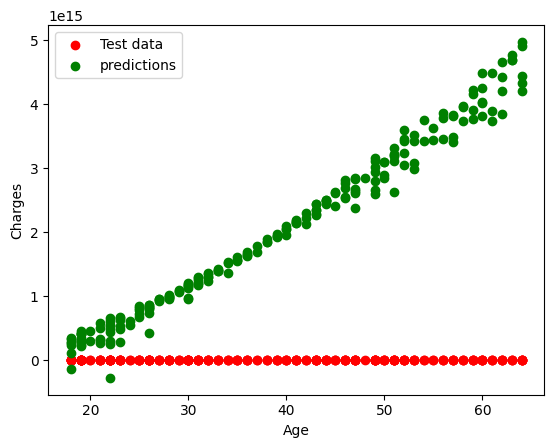

In [4]:
plt.scatter(X_test['age'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['age'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(loc="upper left")
plt.show()

In [5]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  6.116371107082926e+30
Validation MSE:  5.556936436777448e+30
R-squared: -4.237662039629198e+22


## Ridge Regression

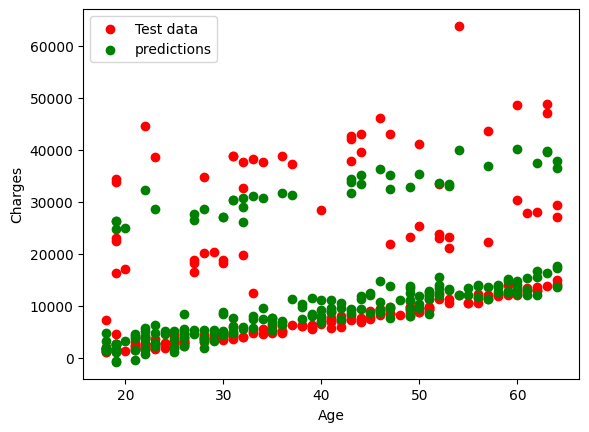

In [6]:
ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l2", max_iter=1000, tol=1e-3, random_state=42))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test['age'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['age'], y_pred, color = "green", label = "predictions")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(loc="upper left")
plt.show()

In [7]:
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
ridge_val_pred = ridge.predict(X_val)

val_error = mean_squared_error(y_val, ridge_val_pred)
train_error = mean_squared_error(y_train, ridge_train_pred)

# Get validation scores
scores = cross_validate(ridge, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = ridge.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  38088352.48838942
Validation MSE:  0.7304419000902906
R-squared: 0.7777598759702894


## Lasso Regression

In [8]:
lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
lasso_val_pred = lasso.predict(X_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores
scores = cross_validate(lasso, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  38087965.24482062
Validation MSE:  0.7304457518792136
R-squared: 0.7777728161513099


## Elastic Net

In [9]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  38088294.17468516
Validation MSE:  0.7304424787115661
R-squared: 0.7777618183130004


## Grid Search

In [10]:
# Grid search - this will take about 1 minute.

SGD = SGDRegressor(penalty="elasticnet")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SGDRegressor(penalty='elasticnet'), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive']})

In [11]:
clf.best_params_

{'alpha': 1e-06, 'learning_rate': 'optimal', 'loss': 'huber'}

## Early Stopping

In [12]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(early_stopping = True, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  37309030.872096464
Validation MSE:  0.7338769849521533
R-squared: 0.7823553744549109
